In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
try:
    df = pd.read_csv('data-2.csv',encoding='ISO-8859-1')
except FileNotFoundError:
    print("file not found locally.")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [377]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [378]:
df.isnull().values.any()

True

In [379]:
df.isnull().sum().sum()

136534

In [380]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [381]:
print(df.duplicated().sum())

5268


### Convert data

**a) converting 'InvoiceDate' object to datetime**

In [384]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce')
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [385]:
print(f"Earliest Date: {df['InvoiceDate'].min()}")
print(f"Latest Date: {df['InvoiceDate'].max()}")

Earliest Date: 2010-12-01 08:26:00
Latest Date: 2011-12-09 12:50:00


 **b) converting 'CustomerID' flaot64 to Int64**

In [387]:
df['CustomerID'] = df['CustomerID'].astype('Int64')
print(df['CustomerID'].dtype)

Int64


In [388]:
df['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: Int64

In [389]:
df['Country'] = pd.Categorical(df['Country'])
print('After conversion:')
print(df['Country'].dtypes)

After conversion:
category


In [390]:
df['Description'] = pd.Categorical(df['Description'])
print('After conversion:')
print(df['Description'].dtypes)

After conversion:
category


In [391]:
print('Final dataframe info: ')
print(df.info())

Final dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  category      
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  category      
dtypes: Int64(1), category(2), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 27.0+ MB
None


### Cleaning data

In [393]:
# List of countries to remove
countries_to_remove = ['EIRE', 'Channel Islands', 'Unspecified', 'European Community']

# Remove rows where Country is in the list
df = df[~df['Country'].isin(countries_to_remove)]

# Remove the now-unused categories
df['Country'] = df['Country'].cat.remove_unused_categories()

In [394]:
df = df.drop_duplicates() #drop duplicates

In [395]:
df = df.dropna(subset=['Description']) #drops desrciption's rows that have missing data

In [396]:
# Fix weird spacing/capitalization in product descriptions.
df['Description'] = df['Description'].str.strip().str.upper()

In [397]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 525743 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    525743 non-null  object        
 1   StockCode    525743 non-null  object        
 2   Description  525743 non-null  object        
 3   Quantity     525743 non-null  int64         
 4   InvoiceDate  525743 non-null  datetime64[ns]
 5   UnitPrice    525743 non-null  float64       
 6   CustomerID   393070 non-null  Int64         
 7   Country      525743 non-null  category      
dtypes: Int64(1), category(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.1+ MB


In [398]:
df = df.dropna(subset=['CustomerID'])
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#### Drop row where unit price <= 0

In [400]:
df = df[df['UnitPrice'] > 1]

#### Separate the return value

In [402]:
df = df[df['Quantity'] > 0]

In [403]:
df['TotalSales'] = df['Quantity']*df['UnitPrice']

## 1. How was the sales over the months from 2010 to 2011?

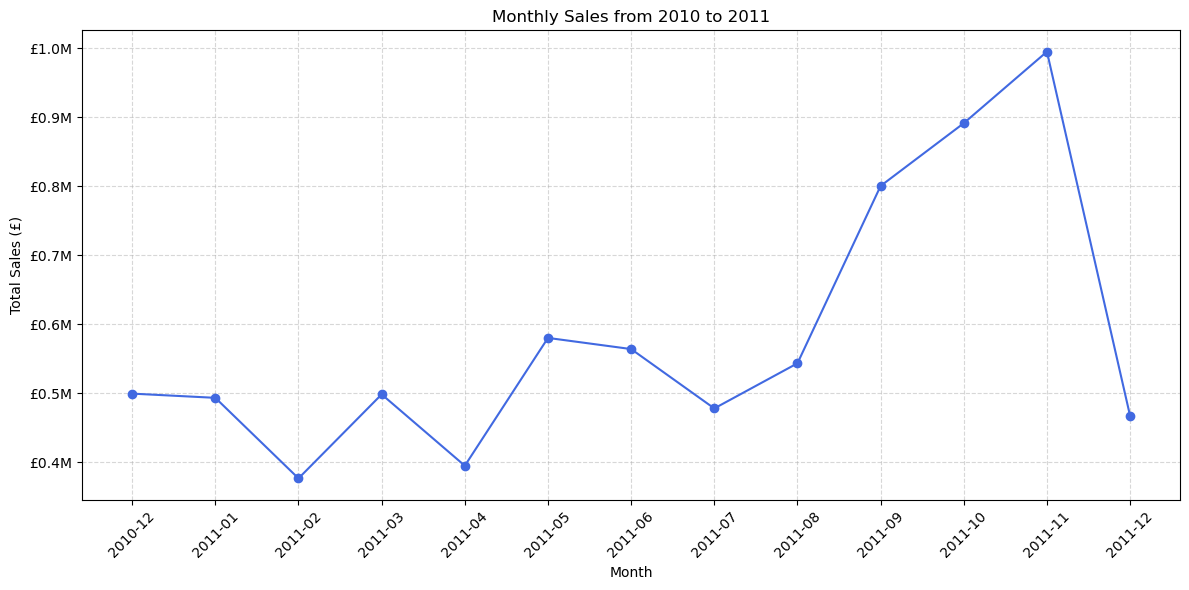

In [405]:
# Extract year-month from InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and sum TotalSales
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalSales'], marker='o', linestyle='-', color='royalblue')
plt.xticks(rotation=45)

# Format Y-axis in millions
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x*1e-6:.1f}M'))

plt.title("Monthly Sales from 2010 to 2011")
plt.xlabel("Month")
plt.ylabel("Total Sales (£)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. Which product has the lowest sales?

In [407]:
product_sales = df.groupby('Description')['TotalSales'].sum().reset_index()
lowest_product = product_sales.sort_values('TotalSales').head(1)
print(lowest_product)

                          Description  TotalSales
2419  SET 36 COLOURING PENCILS DOILEY        1.25


## 3. Which country generate the most income for uk retailers?

In [409]:
country_sales = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalSales'].sum().reset_index()
top_country = country_sales.sort_values('TotalSales', ascending=False).head(1)
print(top_country)

        Country  TotalSales
21  Netherlands   245279.99


/var/folders/q2/2kwwbr913cq295t1jkfm5sdm0000gn/T/ipykernel_2746/1285685844.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalSales'].sum().reset_index()


### 4. What is the average number of items per customers overall?

In [411]:
# Group by CustomerID and sum quantities
items_per_customer = df.groupby('CustomerID')['Quantity'].sum()

# Calculate average
average_items = items_per_customer.mean()
print(f"Average items per customer: {average_items:.2f}")

Average items per customer: 705.75


### 5. How do changes in unit price affect sales volume?

/var/folders/q2/2kwwbr913cq295t1jkfm5sdm0000gn/T/ipykernel_2746/128350002.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_range = df.groupby('PriceRange')['Quantity'].sum()
/var/folders/q2/2kwwbr913cq295t1jkfm5sdm0000gn/T/ipykernel_2746/128350002.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{percentages[i]:.1f}%',


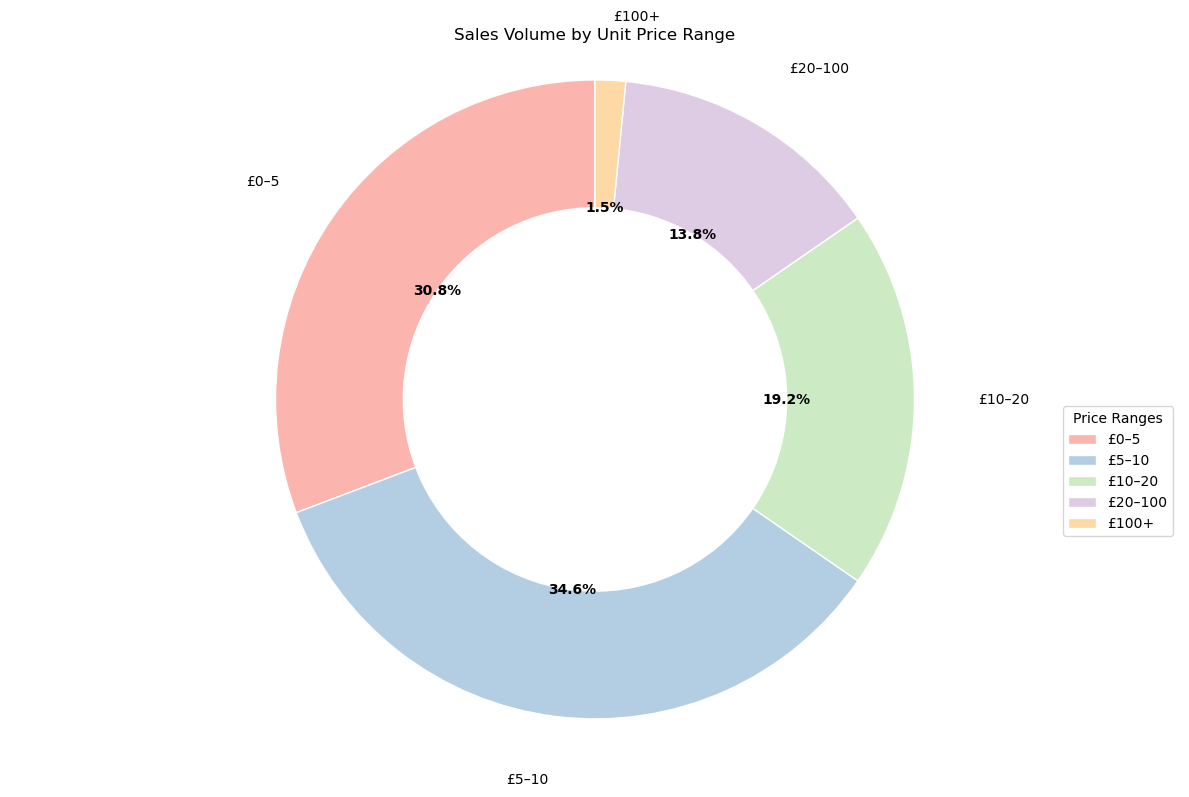

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'UnitPrice': [3, 7, 15, 50, 200, 30, 10, 60, 5, 12],
    'Quantity': [10, 20, 15, 5, 2, 10, 25, 3, 30, 10]
}
df = pd.DataFrame(data)

# Step 1: Create price bins
bins = [0, 5, 10, 20, 100, df['UnitPrice'].max()]
labels = ['£0–5', '£5–10', '£10–20', '£20–100', '£100+']
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=bins, labels=labels, include_lowest=True)

# Step 2: Group by price range and sum quantity
volume_by_range = df.groupby('PriceRange')['Quantity'].sum()

# Step 3: Calculate percent
total = volume_by_range.sum()
percentages = volume_by_range / total * 100

# Step 4: Plot donut chart with labels and percentage inside
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts = ax.pie(
    volume_by_range,
    labels=labels,
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'width': 0.4},  # Donut hole
    labeldistance=1.2  # Move labels further out
)

# Add percentage labels inside the wedges
for i, p in enumerate(wedges):
    angle = (p.theta2 + p.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    # Place text inside the wedge (closer to the middle of the wedge)
    ax.annotate(f'{percentages[i]:.1f}%',
                xy=(x, y),
                xytext=(0.6 * x, 0.6 * y),  # Adjust position inside the wedge
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color='black')  # Ensure text is readable

# Final touch
ax.axis('equal')
plt.title('Sales Volume by Unit Price Range')
plt.legend(wedges, labels, title="Price Ranges", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

### 6. Are repeat customers purchasing less frequently?

In [415]:
# Count purchases per customer per month
monthly_purchases = df_customer.groupby(['CustomerID', 'YearMonth'])['InvoiceNo'].nunique().reset_index()
monthly_purchases.columns = ['CustomerID', 'YearMonth', 'MonthlyPurchases']

In [416]:
# How many have a negative trend (purchasing less frequently over time)?
declining = (trend_data['PurchaseTrend'] < 0).sum()
total = trend_data.shape[0]

print(f"{declining} out of {total} repeat customers are purchasing less frequently.")

480 out of 4287 repeat customers are purchasing less frequently.


In [453]:
# Find repeat customers (more than 1 unique invoice)
repeat_customers = df_customer.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1].index

# Keep only repeat customers in the main DataFrame
df_repeat = df_customer[df_customer['CustomerID'].isin(repeat_customers)]


In [455]:
# Convert to datetime if not already
df_repeat['InvoiceDate'] = pd.to_datetime(df_repeat['InvoiceDate'])
df_repeat['YearMonth'] = df_repeat['InvoiceDate'].dt.to_period('M')

/var/folders/q2/2kwwbr913cq295t1jkfm5sdm0000gn/T/ipykernel_2746/748257416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat['InvoiceDate'] = pd.to_datetime(df_repeat['InvoiceDate'])
/var/folders/q2/2kwwbr913cq295t1jkfm5sdm0000gn/T/ipykernel_2746/748257416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat['YearMonth'] = df_repeat['InvoiceDate'].dt.to_period('M')


In [457]:
# Count number of invoices per customer per month
purchase_matrix = df_repeat.groupby(['CustomerID', 'YearMonth'])['InvoiceNo'].nunique().unstack(fill_value=0)

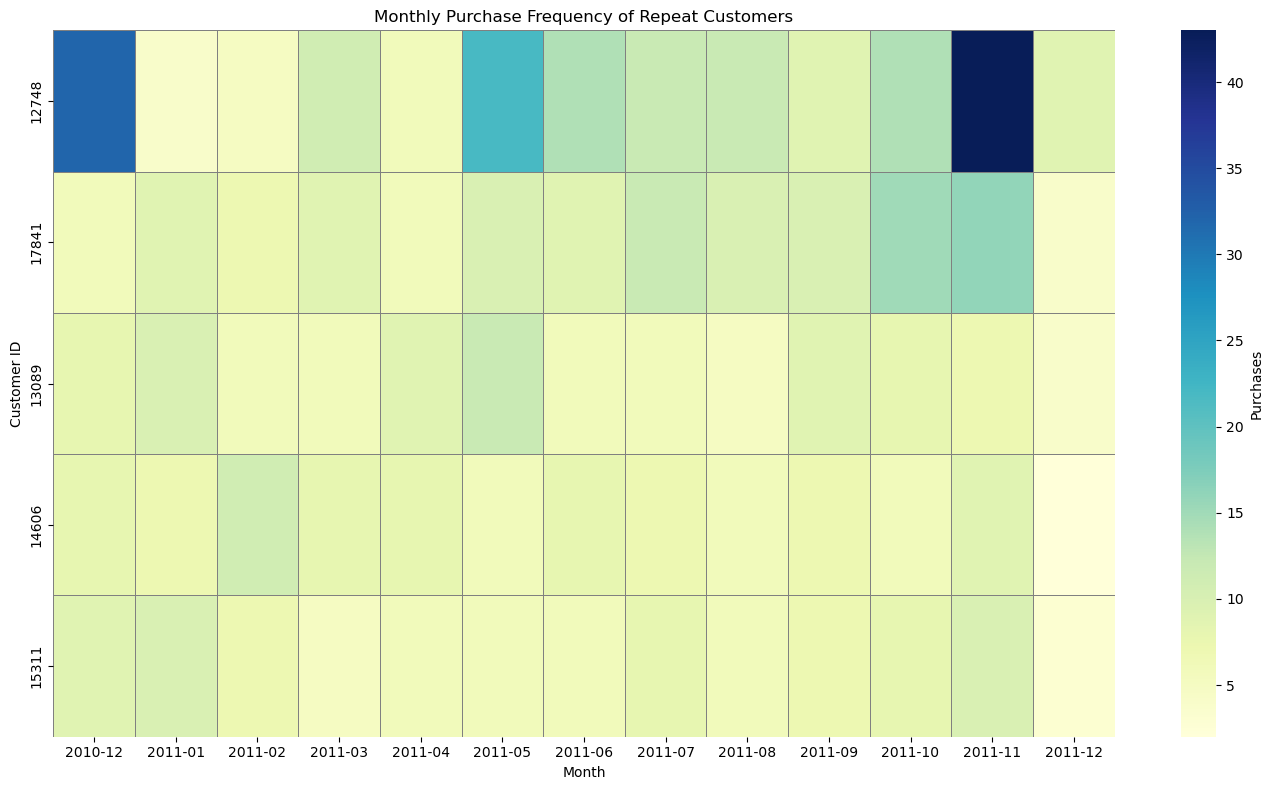

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: limit to top 30 customers for readability
top_customers = purchase_matrix.sum(axis=1).sort_values(ascending=False).head(5).index
purchase_subset = purchase_matrix.loc[top_customers]

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(purchase_subset, cmap='YlGnBu', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Purchases'})
plt.title('Monthly Purchase Frequency of Repeat Customers')
plt.xlabel('Month')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()